## Result Parsing

In [1]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
#Get all results
base = '/scratch/kl3866/IVP/HNeRV/batches/final/8bit_HNeRV_gamut/8bit_HNeRV_gamut'
quant = '/scratch/kl3866/IVP/HNeRV/batches/final/vanilla_HNeRV_gamut'
full_2x = '/scratch/kl3866/IVP/HNeRV/batches/final/2x_1080_HNeRV_gamut/2x_HNeRV_gamut'
brotli = '/scratch/kl3866/IVP/HNeRV/batches/final/2x_1080_HNeRV_gamut/brotli'

In [3]:
bit16 = '/scratch/kl3866/IVP/HNeRV/batches/output/2x_16bit_gamut/'
bit24 = '/scratch/kl3866/IVP/HNeRV/batches/output/2x_24bit_gamut/'
bit8 = '/scratch/kl3866/IVP/HNeRV/batches/output/2x_8bit_gamut/'

In [4]:
#Precomputed n-frames per seq
ct ={'Twilight': 600,
     'SunBath': 300,
     'Bosphorus': 600,
     'RaceNight': 600,
     'FlowerKids': 600,
     'Beauty': 600,
     'CityAlley': 600,
     'ReadySteadyGo': 600,
     'FlowerFocus': 600,
     'Jockey': 600,
     'YatchRide': 600,
     'HoneyBee': 600,
     'ShakeNDry': 300,
     'RiverBank': 600}

In [5]:
fps = {'Twilight': 50,
     'SunBath': 50,
     'Bosphorus': 120,
     'RaceNight': 50,
     'FlowerKids': 50,
     'Beauty': 120,
     'CityAlley': 50,
     'ReadySteadyGo': 120,
     'FlowerFocus': 50,
     'Jockey': 120,
     'YatchRide': 120,
     'HoneyBee': 120,
     'ShakeNDry': 120,
     'RiverBank': 50}

In [6]:
#Helper
# Define function to calculate MSE
def mse(img1, img2):
    mse = np.mean((img1 - img2) ** 2)
    if mse == 0:
        return float('inf')
    return mse

### For Model 1: 8 bit

In [7]:
#Read 
f1 = [os.path.join(bit8,i) for i in os.listdir(bit8) if 'zip' not in i]
f1 = [os.path.join(i,j,'epoch600.csv') for i in f1 for j in os.listdir(i)]

In [8]:
f1_ = [pd.read_csv(i,index_col=0) for i in f1]
f1_ = pd.concat(f1_)

In [9]:
f1_

,Vid,CurEpoch,Train Time,Compression Method,Compression Encoding Time,Compression Decoding Time,"FPS (Quantized, Full Pass)","FPS (Quantized, Forward Pass)","FPS (Full Model, Full Pass)","FPS (Full Model, Forward Pass)",...,best_pred_unseen_psnr,best_pred_unseen_ssim,best_quant_seen_psnr,best_quant_seen_ssim,best_quant_unseen_psnr,best_quant_unseen_ssim,pred_seen_psnr,pred_seen_ssim,pred_unseen_psnr,pred_unseen_ssim
0,2x_FlowerFocus_QTM8_QTE6,600,7:08:21.715042,huffman,0.066514,2.571182,64.865044,76.796852,66.050662,78.495748,...,0.0,0.0,35.14,0.9535,0.0,0.0,37.18,0.9574,0.0,0.0
0,2x_ShakeNDry_QTM8_QTE6,600,1:08:08.126193,huffman,0.067813,2.673661,65.445678,77.493640,66.882928,79.508456,...,0.0,0.0,15.14,0.7583,0.0,0.0,15.14,0.7583,0.0,0.0
0,2x_SunBath_QTM8_QTE6,600,3:14:55.493776,huffman,0.066585,2.594345,65.166928,77.123420,66.460648,78.915439,...,0.0,0.0,34.54,0.9835,0.0,0.0,34.68,0.9839,0.0,0.0
0,2x_RaceNight_QTM8_QTE6,600,6:23:46.076591,huffman,0.071417,2.711403,65.231792,77.176944,66.426787,78.858659,...,0.0,0.0,15.06,0.7907,0.0,0.0,15.06,0.7907,0.0,0.0
0,2x_Jockey_QTM8_QTE6,600,4:11:19.610439,huffman,0.068584,2.672596,65.054213,76.939178,66.389760,78.820045,...,0.0,0.0,13.87,0.7850,0.0,0.0,13.87,0.7850,0.0,0.0
0,2x_RiverBank_QTM8_QTE6,600,6:26:20.825188,huffman,0.071504,2.463581,65.552880,77.627538,66.747840,79.308639,...,0.0,0.0,26.71,0.9264,0.0,0.0,26.72,0.9263,0.0,0.0
0,2x_Beauty_QTM8_QTE6,600,6:55:13.975453,huffman,0.071977,2.628738,65.113623,77.134793,66.376923,78.931374,...,0.0,0.0,32.22,0.8857,0.0,0.0,32.47,0.8870,0.0,0.0
0,2x_CityAlley_QTM8_QTE6,600,5:54:11.544669,huffman,0.068032,2.594986,64.755894,76.616486,65.905279,78.264347,...,0.0,0.0,36.63,0.9779,0.0,0.0,36.76,0.9784,0.0,0.0
0,2x_Bosphorus_QTM8_QTE6,600,7:00:01.621933,huffman,0.072213,2.560689,65.034378,77.033411,66.340806,78.880406,...,0.0,0.0,33.08,0.9295,0.0,0.0,33.18,0.9303,0.0,0.0
0,2x_YatchRide_QTM8_QTE6,600,4:50:16.707179,huffman,0.067523,2.565105,65.263816,77.275093,66.379607,78.890784,...,0.0,0.0,33.78,0.9773,0.0,0.0,33.83,0.9775,0.0,0.0


In [10]:
#Compute BPS
w,h = f1_['Crop'].str.split("_").iloc[0]
pc = float(w) * float(h)

bps = []

for k,v in f1_.iterrows():
    vid = v['Vid'].split('_')[1]
    w,h = v['Crop'].split("_")
    pc = float(w) * float(h) #pixel count per frame; ignore channel
    nframe = ct[vid]
    fp = fps[vid]
    
    bps_ = round(float(v['bits/pixel']) * pc * fp,4)
    bps.append(bps_)
    
f1_['BPS'] = bps

In [16]:
#Read images (ori)
f1_psnrs_ori= []

for ifx,f in enumerate(f1):
    img_ori_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_orig')
    img_ori = [cv2.imread(os.path.join(img_ori_,i)) for i in os.listdir(img_ori_) if 'png' in i]

    #Break into pred vs gt
    h,w,_ = img_ori[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_ori]
    pred = [i[:,(w//2):,:] for i in img_ori]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i.astype(float),j.astype(float)) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f1_psnrs_ori.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f1)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...
13/14...
14/14...


In [17]:
#Read images (quant)
f1_psnrs_quant= []

for ifx,f in enumerate(f1):
    img_quant_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_quant')
    img_quant = [cv2.imread(os.path.join(img_quant_,i)) for i in os.listdir(img_quant_) if 'png' in i]

    #Break into pred vs gt
    h,w,_ = img_quant[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_quant]
    pred = [i[:,(w//2):,:] for i in img_quant]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i.astype(float),j.astype(float)) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f1_psnrs_quant.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f1)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...
13/14...
14/14...


In [18]:
#Store
f1_['Evaluation Quant Overall PSNR'] = f1_psnrs_quant
f1_['Evaluation Orig Overall PSNR'] = f1_psnrs_ori

In [19]:
f1_BPP = pd.read_csv('/scratch/kl3866/IVP/HNeRV/results/HNeRV_2x_1920x960_8bit_brotli_BPP.csv',index_col=0)

In [24]:
f1_names = f1_['Vid'].values
f1_names = [i.split('_')[1] for i in f1_names]
f1_names #good order is the same as f6_BPP; makes life easier

['FlowerFocus',
 'ShakeNDry',
 'SunBath',
 'RaceNight',
 'Jockey',
 'RiverBank',
 'Beauty',
 'CityAlley',
 'Bosphorus',
 'YatchRide',
 'ReadySteadyGo',
 'FlowerKids',
 'Twilight',
 'HoneyBee']

In [25]:
f1_BPP #check if match

,bpp,path,res,nframes
FlowerFocus,0.010382,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
ShakeNDry,0.022194,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,300
SunBath,0.020807,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,300
RaceNight,0.011030,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
Jockey,0.011124,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
RiverBank,0.010305,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
Beauty,0.010395,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
CityAlley,0.010431,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
Bosphorus,0.010422,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600
YatchRide,0.010444,/scratch/kl3866/IVP/HNeRV/batches/output/2x_8b...,1920_960,600


In [26]:
bpps = f1_BPP['bpp'].values
f1_['bits/pixel'] = bpps 
#super-res rate already compensated from model 5's value

In [27]:
f1_

,Vid,CurEpoch,Train Time,Compression Method,Compression Encoding Time,Compression Decoding Time,"FPS (Quantized, Full Pass)","FPS (Quantized, Forward Pass)","FPS (Full Model, Full Pass)","FPS (Full Model, Forward Pass)",...,best_pred_unseen_ssim,best_quant_seen_psnr,best_quant_seen_ssim,best_quant_unseen_psnr,best_quant_unseen_ssim,pred_seen_psnr,pred_seen_ssim,pred_unseen_psnr,pred_unseen_ssim,BPS
0,2x_FlowerFocus_QTM8_QTE6,600,7:08:21.715042,huffman,0.066514,2.571182,64.865044,76.796852,66.050662,78.495748,...,0.0,35.14,0.9535,0.0,0.0,37.18,0.9574,0.0,0.0,9.834703e+05
0,2x_ShakeNDry_QTM8_QTE6,600,1:08:08.126193,huffman,0.067813,2.673661,65.445678,77.493640,66.882928,79.508456,...,0.0,15.14,0.7583,0.0,0.0,15.14,0.7583,0.0,0.0,4.939954e+06
0,2x_SunBath_QTM8_QTE6,600,3:14:55.493776,huffman,0.066585,2.594345,65.166928,77.123420,66.460648,78.915439,...,0.0,34.54,0.9835,0.0,0.0,34.68,0.9839,0.0,0.0,1.951140e+06
0,2x_RaceNight_QTM8_QTE6,600,6:23:46.076591,huffman,0.071417,2.711403,65.231792,77.176944,66.426787,78.858659,...,0.0,15.06,0.7907,0.0,0.0,15.06,0.7907,0.0,0.0,1.035549e+06
0,2x_Jockey_QTM8_QTE6,600,4:11:19.610439,huffman,0.068584,2.672596,65.054213,76.939178,66.389760,78.820045,...,0.0,13.87,0.7850,0.0,0.0,13.87,0.7850,0.0,0.0,2.485295e+06
0,2x_RiverBank_QTM8_QTE6,600,6:26:20.825188,huffman,0.071504,2.463581,65.552880,77.627538,66.747840,79.308639,...,0.0,26.71,0.9264,0.0,0.0,26.72,0.9263,0.0,0.0,9.787465e+05
0,2x_Beauty_QTM8_QTE6,600,6:55:13.975453,huffman,0.071977,2.628738,65.113623,77.134793,66.376923,78.931374,...,0.0,32.22,0.8857,0.0,0.0,32.47,0.8870,0.0,0.0,2.363887e+06
0,2x_CityAlley_QTM8_QTE6,600,5:54:11.544669,huffman,0.068032,2.594986,64.755894,76.616486,65.905279,78.264347,...,0.0,36.63,0.9779,0.0,0.0,36.76,0.9784,0.0,0.0,9.837390e+05
0,2x_Bosphorus_QTM8_QTE6,600,7:00:01.621933,huffman,0.072213,2.560689,65.034378,77.033411,66.340806,78.880406,...,0.0,33.08,0.9295,0.0,0.0,33.18,0.9303,0.0,0.0,2.366834e+06
0,2x_YatchRide_QTM8_QTE6,600,4:50:16.707179,huffman,0.067523,2.565105,65.263816,77.275093,66.379607,78.890784,...,0.0,33.78,0.9773,0.0,0.0,33.83,0.9775,0.0,0.0,2.363846e+06


In [ ]:
f1_.to_csv('results/broccoli_.csv')f1_.to_csv('results/broccoli_.csv')

In [ ]:
#Look at overall PSNR
f1_psnr_quant_avg = np.mean(f1_psnrs_quant)
f1_psnr_ori_avg = np.mean(f1_psnrs_ori)

f1_bpp_avg = f1_['bits/pixel'].mean()

print("[PSNR] >> Quant: {} | Ori: {}".format(f1_psnr_quant_avg,f1_psnr_ori_avg))
print("[BPP]: Avg: {}".format(f1_bpp_avg))

In [19]:
#Save
f1_.to_csv('results/broccoli_.csv')

### For Model 2:  Quant-HNeRV

In [20]:
#Read 
f2 = [os.path.join(quant,i) for i in os.listdir(quant)]
f2 = [os.path.join(i,j,'epoch300.csv') for i in f2 for j in os.listdir(i)]

In [21]:
f2_ = [pd.read_csv(i,index_col=0) for i in f2]
f2_ = pd.concat(f2_)

In [22]:
# #Clean cols
# f2_['Evaluation Orig Overall PSNR'] = f2_['Evaluation Orig Overall PSNR'].str[7:-1].astype(float)
# f2_['Evaluation Quant Overall PSNR'] = f2_['Evaluation Quant Overall PSNR'].str[7:-1].astype(float)

In [23]:
#Read images (ori)
f2_psnrs_ori= []

for ifx,f in enumerate(f2):
    img_ori_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_orig')
    img_ori = [cv2.imread(os.path.join(img_ori_,i)) for i in os.listdir(img_ori_)]

    #Break into pred vs gt
    h,w,_ = img_ori[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_ori]
    pred = [i[:,(w//2):,:] for i in img_ori]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i.astype(float),j.astype(float)) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f2_psnrs_ori.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f2)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...
13/14...
14/14...


In [45]:
#Read images (quant)
f2_psnrs_quant= []

for ifx,f in enumerate(f2):
    img_quant_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_quant')
    img_quant = [cv2.imread(os.path.join(img_quant_,i)) for i in os.listdir(img_quant_) if 'png' in i]

    #Break into pred vs gt
    h,w,_ = img_quant[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_quant]
    pred = [i[:,(w//2):,:] for i in img_quant]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i.astype(float),j.astype(float)) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f2_psnrs_quant.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f2)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...
13/14...
14/14...


In [46]:
#Compute BPS
w,h = f2_['Crop'].str.split("_").iloc[0]
pc = float(w) * float(h)

bps = []

for k,v in f2_.iterrows():
    vid = v['Vid'].split('_')[1]
    w,h = v['Crop'].split("_")
    pc = float(w) * float(h) #pixel count per frame; ignore channel
    nframe = ct[vid]
    fp = fps[vid]
    
    bps_ = round(float(v['bits/pixel']) * pc * fp,4)
    bps.append(bps_)
    
f2_['BPS'] = bps

In [51]:
#Look at overall PSNR
f2_psnr_ori_avg = np.mean([float(i[7:-1]) for i in f2_['Evaluation Orig Overall PSNR']])
f2_psnr_quant_avg = np.mean([float(i[7:-1]) for i in f2_['Evaluation Quant Overall PSNR']])

f2_bpp_avg = f2_['bits/pixel'].mean()

print("[PSNR] >> Quant: {} | Ori: {}".format(f2_psnr_quant_avg,f2_psnr_ori_avg))
print("[BPP]: Avg: {}".format(f2_bpp_avg))

[PSNR] >> Quant: 31.41642857142858 | Ori: 31.348571428571425
[BPP]: Avg: 0.008421386202050215


In [52]:
#Save
f2_.to_csv('results/f2_2.csv')

### For Model 3 (SKIP)

In [53]:
#Read 
f3 = [os.path.join(full_2x,i) for i in os.listdir(full_2x) if 'test' not in i and 'zip' not in i]
f3 = [os.path.join(i,j,'epoch600.csv') for i in f3 for j in os.listdir(i)]

In [20]:
f3_ = [pd.read_csv(i,index_col=0) for i in f3]
f3_ = pd.concat(f3_)

In [21]:
f3_

,Vid,CurEpoch,Train Time,Compression Method,Compression Encoding Time,Compression Decoding Time,"FPS (Quantized, Full Pass)","FPS (Quantized, Forward Pass)","FPS (Full Model, Full Pass)","FPS (Full Model, Forward Pass)",...,best_pred_unseen_psnr,best_pred_unseen_ssim,best_quant_seen_psnr,best_quant_seen_ssim,best_quant_unseen_psnr,best_quant_unseen_ssim,pred_seen_psnr,pred_seen_ssim,pred_unseen_psnr,pred_unseen_ssim
0,2x_Twilight_QTM32_QTE6,600,7:02:00.733412,huffman,0.066549,0.684763,64.585828,76.383212,65.798297,78.090270,...,0.0,0.0,37.67,0.9758,0.0,0.0,37.69,0.9759,0.0,0.0
0,2x_SunBath_QTM32_QTE6,600,3:33:56.519167,huffman,0.062623,0.658185,64.865925,76.750775,66.200609,78.617983,...,0.0,0.0,31.66,0.9420,0.0,0.0,31.80,0.9429,0.0,0.0
0,2x_Bosphorus_QTM32_QTE6,600,7:02:48.721272,huffman,0.062686,0.635391,64.827202,76.671286,65.884402,78.175670,...,0.0,0.0,33.15,0.9299,0.0,0.0,33.19,0.9304,0.0,0.0
0,2x_RaceNight_QTM32_QTE6,600,6:59:21.954014,huffman,0.062612,0.643195,64.881959,76.756335,66.164501,78.562340,...,0.0,0.0,26.71,0.8660,0.0,0.0,26.84,0.8676,0.0,0.0
0,2x_FlowerKids_QTM32_QTE6,600,7:03:43.157742,huffman,0.064097,0.646230,64.972279,76.910912,66.362568,78.872210,...,0.0,0.0,26.91,0.8614,0.0,0.0,26.96,0.8622,0.0,0.0
0,2x_Beauty_QTM32_QTE6,600,6:58:33.950881,huffman,0.063758,0.652844,64.897789,76.808638,66.183605,78.612811,...,0.0,0.0,32.45,0.8867,0.0,0.0,32.47,0.8870,0.0,0.0
0,2x_CityAlley_QTM32_QTE6,600,6:02:33.577684,huffman,0.065890,0.651282,65.007791,76.926433,66.244495,78.670481,...,0.0,0.0,36.79,0.9786,0.0,0.0,36.81,0.9787,0.0,0.0
0,2x_ReadySteadyGo_QTM32_QTE6,600,7:08:25.188475,huffman,0.062787,0.639482,65.072930,77.039210,66.253086,78.711470,...,0.0,0.0,24.03,0.8057,0.0,0.0,24.12,0.8074,0.0,0.0
0,2x_FlowerFocus_QTM32_QTE6,600,7:09:04.546215,huffman,0.064157,0.643068,65.021635,76.934516,66.249205,78.654600,...,0.0,0.0,37.13,0.9572,0.0,0.0,37.18,0.9574,0.0,0.0
0,2x_Jockey_QTM32_QTE6,600,6:14:23.845009,huffman,0.063332,0.632566,64.882816,76.778437,66.149655,78.562291,...,0.0,0.0,30.26,0.8629,0.0,0.0,30.38,0.8641,0.0,0.0


In [22]:
#Read images (ori)
f3_psnrs_ori= []

for ifx,f in enumerate(f3):
    img_ori_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_orig')
    img_ori = [cv2.imread(os.path.join(img_ori_,i)) for i in os.listdir(img_ori_)[:2]]

    #Break into pred vs gt
    h,w,_ = img_ori[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_ori]
    pred = [i[:,(w//2):,:] for i in img_ori]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i,j) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f3_psnrs_ori.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f3)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...
13/14...
14/14...


In [23]:
#Read images (quant)
f3_psnrs_quant= []

for ifx,f in enumerate(f3):
    img_quant_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_quant')
    img_quant = [cv2.imread(os.path.join(img_quant_,i)) for i in os.listdir(img_quant_)[:2]]

    #Break into pred vs gt
    h,w,_ = img_quant[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_quant]
    pred = [i[:,(w//2):,:] for i in img_quant]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i,j) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f3_psnrs_quant.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f3)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...
13/14...
14/14...


In [25]:
#Store
f3_['Evaluation Quant Overall PSNR'] = f3_psnrs_quant
f3_['Evaluation Orig Overall PSNR'] = f3_psnrs_ori

amend BPP; no huffman; / 4

### For Model 4: Quant-2x-HNeRV (Skip)

### For Model 5: Huffman-2x-HNeRV

In [54]:
#Read 
f5 = [os.path.join(full_2x,i) for i in os.listdir(full_2x) if 'test' not in i and 'zip' not in i]
f5 = [os.path.join(i,j,'epoch600.csv') for i in f5 for j in os.listdir(i)]

In [55]:
f5_ = [pd.read_csv(i,index_col=0) for i in f5]
f5_ = pd.concat(f5_)

In [56]:
f5_

,Vid,CurEpoch,Train Time,Compression Method,Compression Encoding Time,Compression Decoding Time,"FPS (Quantized, Full Pass)","FPS (Quantized, Forward Pass)","FPS (Full Model, Full Pass)","FPS (Full Model, Forward Pass)",...,best_pred_unseen_psnr,best_pred_unseen_ssim,best_quant_seen_psnr,best_quant_seen_ssim,best_quant_unseen_psnr,best_quant_unseen_ssim,pred_seen_psnr,pred_seen_ssim,pred_unseen_psnr,pred_unseen_ssim
0,2x_Twilight_QTM32_QTE6,600,7:02:00.733412,huffman,0.066549,0.684763,64.585828,76.383212,65.798297,78.090270,...,0.0,0.0,37.67,0.9758,0.0,0.0,37.69,0.9759,0.0,0.0
0,2x_SunBath_QTM32_QTE6,600,3:33:56.519167,huffman,0.062623,0.658185,64.865925,76.750775,66.200609,78.617983,...,0.0,0.0,31.66,0.9420,0.0,0.0,31.80,0.9429,0.0,0.0
0,2x_Bosphorus_QTM32_QTE6,600,7:02:48.721272,huffman,0.062686,0.635391,64.827202,76.671286,65.884402,78.175670,...,0.0,0.0,33.15,0.9299,0.0,0.0,33.19,0.9304,0.0,0.0
0,2x_RaceNight_QTM32_QTE6,600,6:59:21.954014,huffman,0.062612,0.643195,64.881959,76.756335,66.164501,78.562340,...,0.0,0.0,26.71,0.8660,0.0,0.0,26.84,0.8676,0.0,0.0
0,2x_FlowerKids_QTM32_QTE6,600,7:03:43.157742,huffman,0.064097,0.646230,64.972279,76.910912,66.362568,78.872210,...,0.0,0.0,26.91,0.8614,0.0,0.0,26.96,0.8622,0.0,0.0
0,2x_Beauty_QTM32_QTE6,600,6:58:33.950881,huffman,0.063758,0.652844,64.897789,76.808638,66.183605,78.612811,...,0.0,0.0,32.45,0.8867,0.0,0.0,32.47,0.8870,0.0,0.0
0,2x_CityAlley_QTM32_QTE6,600,6:02:33.577684,huffman,0.065890,0.651282,65.007791,76.926433,66.244495,78.670481,...,0.0,0.0,36.79,0.9786,0.0,0.0,36.81,0.9787,0.0,0.0
0,2x_ReadySteadyGo_QTM32_QTE6,600,7:08:25.188475,huffman,0.062787,0.639482,65.072930,77.039210,66.253086,78.711470,...,0.0,0.0,24.03,0.8057,0.0,0.0,24.12,0.8074,0.0,0.0
0,2x_FlowerFocus_QTM32_QTE6,600,7:09:04.546215,huffman,0.064157,0.643068,65.021635,76.934516,66.249205,78.654600,...,0.0,0.0,37.13,0.9572,0.0,0.0,37.18,0.9574,0.0,0.0
0,2x_Jockey_QTM32_QTE6,600,6:14:23.845009,huffman,0.063332,0.632566,64.882816,76.778437,66.149655,78.562291,...,0.0,0.0,30.26,0.8629,0.0,0.0,30.38,0.8641,0.0,0.0


In [ ]:
#Read images (ori)
f5_psnrs_ori= []

for ifx,f in enumerate(f5):
    img_ori_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_orig')
    img_ori = [cv2.imread(os.path.join(img_ori_,i)) for i in os.listdir(img_ori_)]

    #Break into pred vs gt
    h,w,_ = img_ori[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_ori]
    pred = [i[:,(w//2):,:] for i in img_ori]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i.astype(float),j.astype(float)) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255.0**2 / np.mean(mses))
    
    #Log
    f5_psnrs_ori.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f5)))

1/14...
2/14...
3/14...
4/14...
5/14...
6/14...
7/14...
8/14...
9/14...
10/14...
11/14...
12/14...


In [ ]:
#Read images (quant)
f5_psnrs_quant= []

for ifx,f in enumerate(f5):
    img_quant_ = os.path.join('/'.join(f.split('/')[:-1]), 'visualize_model_quant')
    img_quant = [cv2.imread(os.path.join(img_quant_,i)) for i in os.listdir(img_quant_)]

    #Break into pred vs gt
    h,w,_ = img_quant[0].shape
    
    gt = [i[:,:(w//2),:] for i in img_quant]
    pred = [i[:,(w//2):,:] for i in img_quant]
    
    assert gt[0].max() <= 255, "Error! Max val >255"
    
    #Compute PSNR
    mses = [mse(i.astype(float),j.astype(float)) for i,j in zip(gt,pred)]
    psnr = 10 * np.log10(255**2 / np.mean(mses))
    
    #Log
    f5_psnrs_quant.append(psnr)
    
    print("{}/{}...".format(ifx+1,len(f5)))

In [ ]:
#Store
f5_['Evaluation Quant Overall PSNR'] = f5_psnrs_quant
f5_['Evaluation Orig Overall PSNR'] = f5_psnrs_ori

In [ ]:
#Compensate BPP
f5_['bits/pixel'] = f5_['bits/pixel'] / 4 #2*2 from super_rate compensation

In [ ]:
#Compute BPS
w,h = f5_['Crop'].str.split("_").iloc[0]
pc = float(w) * float(h)

bps = []

for k,v in f5_.iterrows():
    vid = v['Vid'].split('_')[1]
    w,h = v['Crop'].split("_")
    pc = float(w) * float(h) #pixel count per frame; ignore channel
    nframe = ct[vid]
    fp = fps[vid]
    
    bps_ = round(float(v['bits/pixel']) * pc * fp,4)
    bps.append(bps_)
    
f5_['BPS'] = bps

In [ ]:
#Look at overall PSNR
f5_psnr_ori_avg = np.mean(f5_['Evaluation Orig Overall PSNR'])
f5_psnr_quant_avg = np.mean(f5_['Evaluation Quant Overall PSNR'])

f5_bpp_avg = f5_['bits/pixel'].mean()

print("[PSNR] >> Quant: {} | Ori: {}".format(f5_psnr_quant_avg,f5_psnr_ori_avg))
print("[BPP]: Avg: {}".format(f5_bpp_avg))

In [ ]:
#Save
f5_.to_csv('results/f5_5.csv')

### For Model 6:  Brotli-2x-HNeRV or HNeRV-XS

In [ ]:
f6_ = f5_.copy() #just use stat from model5 since they're the same, just different BPP

In [ ]:
f6_BPP = pd.read_csv('/scratch/kl3866/IVP/HNeRV/results/HNeRV_2x_1920x960_brotli_BPP.csv',index_col=0)

In [ ]:
f6_names = f6_['Vid'].values
f6_names = [i.split('_')[1] for i in f6_names]
f6_names #good order is the same as f6_BPP; makes life easier

In [ ]:
f6_BPP #check if match

In [ ]:
bpps = f6_BPP['bpp'].values
f6_['bits/pixel'] = bpps 
#super-res rate already compensated from model 5's value

In [ ]:
#Compute BPS
w,h = f6_['Crop'].str.split("_").iloc[0]
pc = float(w) * float(h)

bps = []

for k,v in f6_.iterrows():
    vid = v['Vid'].split('_')[1]
    w,h = v['Crop'].split("_")
    pc = float(w) * float(h) #pixel count per frame; ignore channel
    nframe = ct[vid]
    fp = fps[vid]
    
    bps_ = round(float(v['bits/pixel']) * pc * fp,4)
    bps.append(bps_)
    
f6_['BPS'] = bps

In [ ]:
#Look at overall PSNR
f6_psnr_ori_avg = np.mean(f6_['Evaluation Orig Overall PSNR'])
f6_psnr_quant_avg = np.mean(f6_['Evaluation Quant Overall PSNR'])

f6_bpp_avg = f6_['bits/pixel'].mean()

print("[PSNR] >> Quant: {} | Ori: {}".format(f6_psnr_quant_avg,f6_psnr_ori_avg))
print("[BPP]: Avg: {}".format(f6_bpp_avg))

In [ ]:
#Save
f6_.to_csv('results/f6_6.csv')

____
### Final Stats

In [5]:
#Read
f1 = pd.read_csv('results/f1.csv')
f2 = pd.read_csv('results/f2.csv')
f5 = pd.read_csv('results/f5.csv')
f6 = pd.read_csv('results/f6.csv')
hevc = pd.read_csv('results/hevc.csv')

In [88]:
#Take relevant cols only
f1_ = f1[['Vid','Crop','Epoch','bits/pixel','BPS','Evaluation Quant Overall PSNR','Evaluation Orig Overall PSNR']]
f1_.columns = [['Vid','Resolution','Train Epoch','BPP','BPS','Quant PSNR','Ori PSNR']]
f1_['Model'] = 'Vanilla 8bit'

f2_ = f2[['Vid','Crop','Epoch','bits/pixel','BPS','Evaluation Quant Overall PSNR','Evaluation Orig Overall PSNR']]
f2_.columns = [['Vid','Resolution','Train Epoch','BPP','BPS','Quant PSNR','Ori PSNR']]
f2_['Model'] = 'Vanilla 32bit'

f5_ = f5[['Vid','Crop','Epoch','bits/pixel','BPS','Evaluation Quant Overall PSNR','Evaluation Orig Overall PSNR']]
f5_.columns = [['Vid','Resolution','Train Epoch','BPP','BPS','Quant PSNR','Ori PSNR']]
f5_['Model'] = '2x 32bit'

f6_ = f6[['Vid','Crop','Epoch','bits/pixel','BPS','Evaluation Quant Overall PSNR','Evaluation Orig Overall PSNR']]
f6_.columns = [['Vid','Resolution','Train Epoch','BPP','BPS','Quant PSNR','Ori PSNR']]
f6_['Model'] = 'Broccoli'

/state/partition1/job-33208038/ipykernel_759554/872183919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f1_['Model'] = 'Vanilla 8bit'
/state/partition1/job-33208038/ipykernel_759554/872183919.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  f2_['Model'] = 'Vanilla 32bit'
/state/partition1/job-33208038/ipykernel_759554/872183919.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [89]:
#Combine
df1 = pd.concat([f1_,f2_,f5_,f6_],axis=0)

In [90]:
df1.tail()

,Vid,Resolution,Train Epoch,BPP,BPS,Quant PSNR,Ori PSNR,Model
9,2x_Jockey_QTM32_QTE6,960_1920,600,0.000464,102678.4,30.020039,30.143875,Broccoli
10,2x_YatchRide_QTM32_QTE6,960_1920,600,0.000614,135913.6,27.869008,27.910824,Broccoli
11,2x_HoneyBee_QTM32_QTE6,960_1920,600,0.000763,168707.2,37.845171,37.861546,Broccoli
12,2x_ShakeNDry_QTM32_QTE6,960_1920,600,0.001493,330320.0,33.239051,33.246106,Broccoli
13,2x_RiverBank_QTM32_QTE6,960_1920,600,0.000631,58168.0,27.478927,27.499972,Broccoli


In [124]:
#For HEVC
df2_960_agg = hevc.loc[hevc.Resolution=='960x540'].groupby(['QP']).mean()
df2_1080_agg = hevc.loc[hevc.Resolution=='1920x1080'].groupby(['QP']).mean()

In [95]:
#Read saved out to bypass pesky groupby issue
df1 = pd.read_csv('results/aggregated.csv',index_col=0)

In [98]:
df1_agg = df1.groupby('Model').mean()

,Train Epoch,BPP,BPS,Quant PSNR,Ori PSNR
Model,,,,,
2x 32bit,600.0,0.001802,2.812148e+05,31.594854,31.651691
Broccoli,600.0,0.000809,1.228457e+05,31.594854,31.651691
Vanilla 32bit,300.0,0.008421,3.281193e+05,31.416429,31.348571
Vanilla 8bit,300.0,0.049385,1.934169e+06,33.068937,33.178493


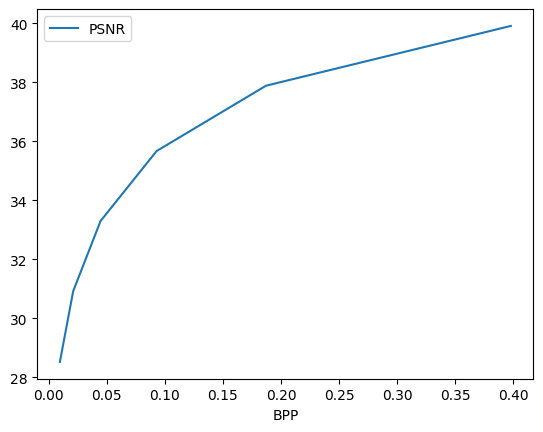

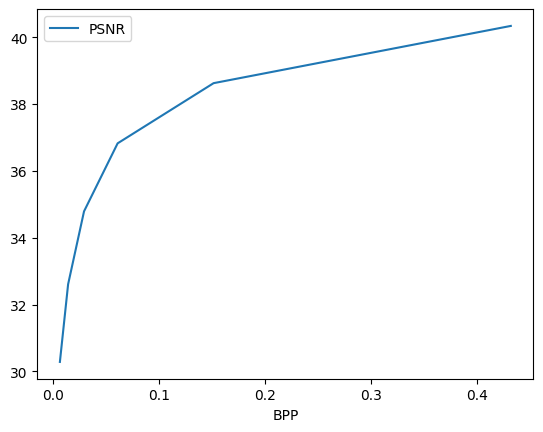

In [129]:
#Plot
df2_960_agg.plot(x='BPP',y='PSNR')
df2_1080_agg.plot(x='BPP',y='PSNR')
plt.show()

<AxesSubplot: xlabel='BPP'>

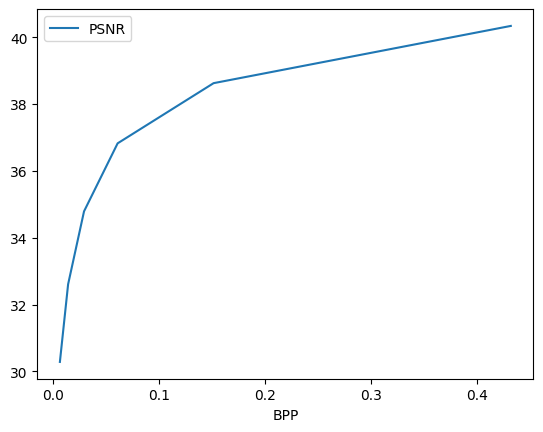

In [128]:
df2_1080_agg.plot(x='BPP',y='PSNR')

In [117]:
need to plot diff chart for diff resolution

SyntaxError: invalid syntax (4126434854.py, line 1)

In [100]:
#Best vs default (Model 6 vs Model 1)
0.04938486018105153 / 0.0008089342551256001 #61x better BPP with ~equal PSNR

61.0492878353677

-----
### Draft

In [3]:
# !python run_hnerv.py --data_path "/scratch/ar7996/ivp/uvgdataset/Beauty_3840x2160_120fps_420_8bit_YUV_RAW/Beauty_3840x2160_YUV_444_1920x1080_cropped_images/"  \
#                       --batchSize 1 \
#                       --vid 2x_Beauty_QTM32_QTE6_test \
#                       --outf batches/final/2x_1080_HNeRV_gamut/2x_HNeRV_gamut/ \
#                       --conv_type convnext pshuffel \
#                       --eval_only \
#                       --act gelu \
#                       --norm none  \
#                       --crop_list 960_1920 \
#                       --resize_list -1 \
#                       --loss L2 \
#                       --enc_strds 5 4 4 3 2 \
#                       --enc_dim 64_16 \
#                       --dec_strds 5 4 4 3 2 \
#                       --ks 0_1_5 \
#                       --reduce 1.2 \
#                       --modelsize 1.5  \
#                       --epochs 600 \
#                       --eval_freq 50 \
#                       --lower_width 12 \
#                       --lr 0.001 \
#                       --super \
#                       --super_rate 2 \
#                       --quant_model_bit 32 \
#                       --quant_embed_bit 6 \
#                       --hard_outf \
#                       --dump_images 